# Predicting Suicidal Ideation Using Machine learning/ Deep Learning


In [ ]:
import pandas as pd
import csv
import json
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly as plty
from sklearn import preprocessing
import sklearn.feature_extraction.text as tfidf
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn import svm
import collections
from sklearn.naive_bayes import MultinomialNB

## Function to Plot ROC curve

In [ ]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

#  Exploratory Data Analysis

## Dataset is downloaded from kaggle website 


## Dataset name - ForeverAlone Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read CSV file from drive

In [ ]:
df = pd.read_csv("drive/My Drive/foreveralone.csv")

## Print head of the dataframe obtained by reading csv using pandas library

In [ ]:
df.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
time                     469 non-null object
gender                   469 non-null object
sexuallity               469 non-null object
age                      469 non-null int64
income                   469 non-null object
race                     469 non-null object
bodyweight               469 non-null object
virgin                   469 non-null object
prostitution_legal       469 non-null object
pay_for_sex              469 non-null object
friends                  469 non-null float64
social_fear              469 non-null object
depressed                469 non-null object
what_help_from_others    469 non-null object
attempt_suicide          469 non-null object
employment               469 non-null object
job_title                457 non-null object
edu_level                469 non-null object
improve_yourself_how     469 non-null object
dtypes: float64(1), int64(1), object(17)

In [ ]:
df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


## Check for any duplicates present in the dataFrame

In [ ]:
df.duplicated().any()

False

## False indicates no duplicate records present

## Check for any null values in the dataFrame

In [ ]:
df.isna().any()

time                     False
gender                   False
sexuallity               False
age                      False
income                   False
race                     False
bodyweight               False
virgin                   False
prostitution_legal       False
pay_for_sex              False
friends                  False
social_fear              False
depressed                False
what_help_from_others    False
attempt_suicide          False
employment               False
job_title                 True
edu_level                False
improve_yourself_how     False
dtype: bool

## Count of each distinct job_title

In [ ]:
df.job_title.value_counts()

Student                                                         50
student                                                         25
none                                                            17
None                                                            12
Unemployed                                                      11
Engineer                                                         9
Student                                                          7
.                                                                6
-                                                                6
Intern                                                           5
Software Engineer                                                5
Cashier                                                          4
na                                                               4
Nothing                                                          4
engineer                                                      

## Check info about type of each feature

In [ ]:
df.info()

## We observe that datatype of friends is in float. number of friends cannot be in float. Therefore converting it to int data type is necessary.

In [ ]:
# change dataype to int
df['friends'] = df['friends'].astype(np.int64)

## Check again if the modification done on friends column is successfully done

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
time                     469 non-null object
gender                   469 non-null object
sexuallity               469 non-null object
age                      469 non-null int64
income                   469 non-null object
race                     469 non-null object
bodyweight               469 non-null object
virgin                   469 non-null object
prostitution_legal       469 non-null object
pay_for_sex              469 non-null object
friends                  469 non-null int64
social_fear              469 non-null object
depressed                469 non-null object
what_help_from_others    469 non-null object
attempt_suicide          469 non-null object
employment               469 non-null object
job_title                457 non-null object
edu_level                469 non-null object
improve_yourself_how     469 non-null object
dtypes: int64(2), object(17)
memory usage:

##Droping rows which consists of null values

In [ ]:
df.dropna(inplace=True)

## Conforming again if any null values are present

In [ ]:
df.isna().any()

time                     False
gender                   False
sexuallity               False
age                      False
income                   False
race                     False
bodyweight               False
virgin                   False
prostitution_legal       False
pay_for_sex              False
friends                  False
social_fear              False
depressed                False
what_help_from_others    False
attempt_suicide          False
employment               False
job_title                False
edu_level                False
improve_yourself_how     False
dtype: bool

In [ ]:
# strip stings with white space
df['job_title'] = df.job_title.str.strip()

### Function to replace job_title values to make them consistent and standardizing values for example student as Student for every record. Othervise two unique values will be used like student and Student which are same but model will consider them as two distinct *values*.

In [ ]:
# Function to replace job_title values
def replace_text(what, to):
    df.replace(what, to, inplace= True)

## Call replace_text function tostandardize values across multiple columns

In [ ]:
replace_text('student', 'Student')
replace_text('none', 'None')
replace_text("N/a", 'None')
replace_text('na', 'None')
replace_text('-', 'None')
replace_text('.', 'None')
replace_text('*', 'None')
replace_text('ggg', 'None')

In [ ]:
df.job_title.value_counts()

Student                         82
None                            51
Unemployed                      13
Engineer                         9
Software Engineer                6
Intern                           5
Nothing                          4
Software developer               4
Cashier                          4
Teacher                          3
Software Developer               3
Clerk                            3
engineer                         3
Technician                       3
NEET                             3
Designer                         2
nothing                          2
Grad student                     2
Accountant                       2
Courier                          2
Manager                          2
Auditor                          2
Research assistant               2
Janitor                          2
Sales                            2
Consultant                       2
IT                               2
Admin                            2
loser               

## Statistics of Gender column

In [ ]:
df.gender.value_counts()

Male                  382
Female                 72
Transgender male        2
Transgender female      1
Name: gender, dtype: int64

## Visualizing Gender Frequency

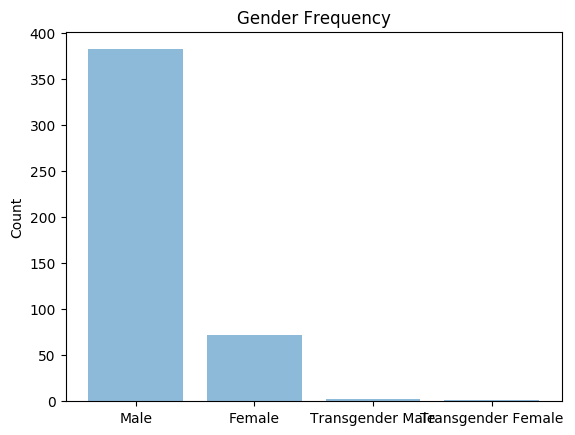

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Male', 'Female', 'Transgender Male', 'Transgender Female')
y_pos = np.arange(len(objects))
performance = df.gender.value_counts()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Gender Frequency')

plt.show()

## Statistics of sexuality column

In [ ]:
# sexuality freqency

df.sexuallity.value_counts()

Straight       404
Bisexual        45
Gay/Lesbian      8
Name: sexuallity, dtype: int64

## Visualizing satistics of column sexuality

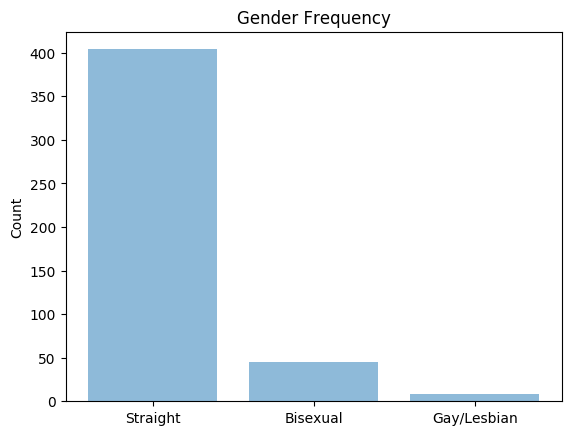

In [ ]:
objects = ('Straight', 'Bisexual','Gay/Lesbian')
y_pos = np.arange(len(objects))
performance = df.sexuallity.value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Sexuality Frequency')

plt.show()

## BodyWeight Column Statistics

In [ ]:
# body weight

df.bodyweight.value_counts()

Normal weight    265
Overweight       110
Underweight       57
Obese             25
Name: bodyweight, dtype: int64

## Visualizing the Bodyweigt column frequency

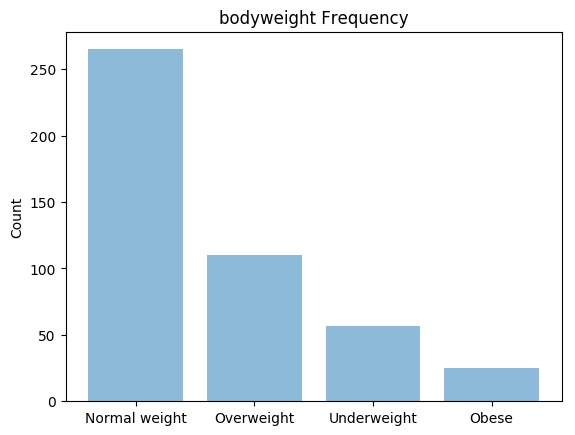

In [ ]:
objects = ('Normal weight', 'Overweight','Underweight','Obese')
y_pos = np.arange(len(objects))
performance = df.bodyweight.value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('bodyweight Frequency')
plt.show()

In [ ]:
# depressed

df.depressed.value_counts()

Yes    303
No     154
Name: depressed, dtype: int64

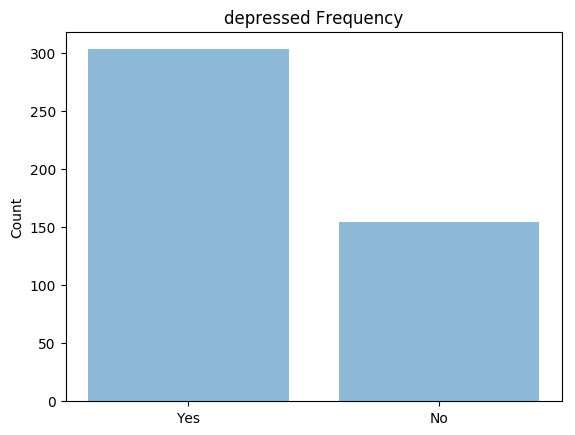

In [ ]:
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = df.depressed.value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('depressed Frequency')
plt.show()

In [ ]:
df.social_fear.value_counts()

Yes    297
No     160
Name: social_fear, dtype: int64

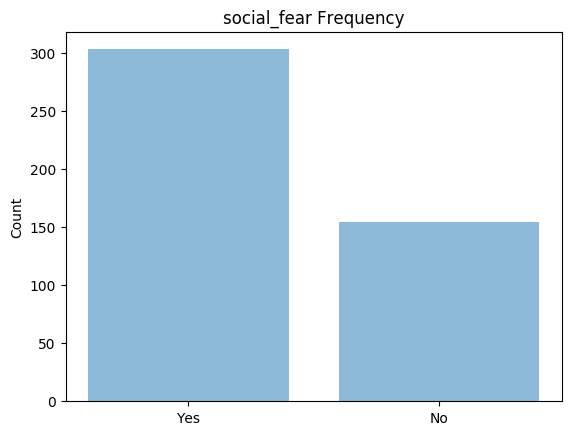

In [ ]:
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = df.depressed.value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('social_fear Frequency')
plt.show()

# Attempt Suicide Frequency statistics

In [ ]:
df.attempt_suicide.value_counts()

No     372
Yes     85
Name: attempt_suicide, dtype: int64

## Attempt_suicide column frequency statistics

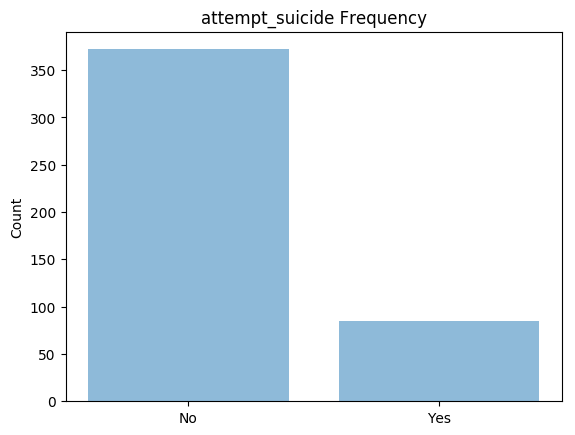

In [ ]:
objects = ('No', 'Yes')
y_pos = np.arange(len(objects))
performance = df.attempt_suicide.value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('attempt_suicide Frequency')
plt.show()

# Visualizing Histogram of various columns in data frame

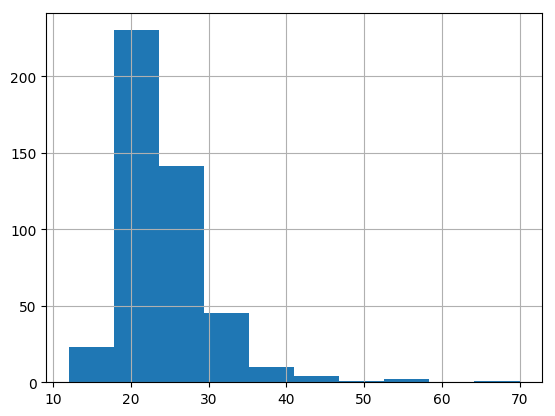

In [ ]:
df['age'].hist()

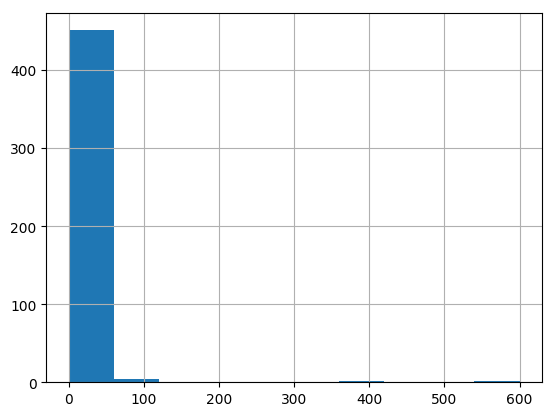

In [ ]:
df['friends'].hist()

In [ ]:
male = df[df['gender'] == 'Male' ]
female = df[df['gender'] == 'Female' ]



In [ ]:
df.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,None,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,Yes,date coaching,No,A student,Student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


## Checking datatypes for each column feature

In [ ]:
df.dtypes

time                     object
gender                   object
sexuallity               object
age                       int64
income                   object
race                     object
bodyweight               object
virgin                   object
prostitution_legal       object
pay_for_sex              object
friends                   int64
social_fear              object
depressed                object
what_help_from_others    object
attempt_suicide          object
employment               object
job_title                object
edu_level                object
improve_yourself_how     object
dtype: object

# Determining unique entries in features of dataframe

## This will allow us to conform no discrepancy among records is present

In [ ]:

df['sexuallity'].unique()

array(['Straight', 'Bisexual', 'Gay/Lesbian'], dtype=object)

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Transgender male', 'Transgender female'],
      dtype=object)

In [ ]:
df['race'].unique()

array(['White non-Hispanic', 'Hispanic (of any race)', 'Asian',
       'white and asian', 'caucasian', 'Black', 'Middle Eastern',
       'half Arab', 'Pakistani', 'helicopterkin', 'Turkish', 'Indian',
       'Native american', 'Mixed', 'mixed', 'Mixed white/asian', 'indian',
       'Multi', 'Native American mix', 'North African',
       'White and Native American',
       'First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.',
       'European'], dtype=object)

In [ ]:
df['bodyweight'].unique()

array(['Normal weight', 'Underweight', 'Overweight', 'Obese'],
      dtype=object)

In [ ]:
df['virgin'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['income'].unique()

array(['$30,000 to $39,999', '$1 to $10,000', '$0', '$50,000 to $74,999',
       '$20,000 to $29,999', '$10,000 to $19,999', '$75,000 to $99,999',
       '$150,000 to $174,999', '$125,000 to $149,999',
       '$100,000 to $124,999', '$174,999 to $199,999',
       '$40,000 to $49,999', '$200,000 or more'], dtype=object)

In [ ]:
df['prostitution_legal'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['pay_for_sex'].unique()

array(['No', 'Yes and I have', "Yes but I haven't"], dtype=object)

In [ ]:
df['depressed'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['employment'].unique()

array(['Employed for wages', 'Out of work and looking for work',
       'Out of work but not currently looking for work', 'A student',
       'Unable to work', 'Retired', 'Military', 'Self-employed',
       'A homemaker'], dtype=object)

In [ ]:
df['edu_level'].unique()

array(['Associate degree', 'Some college, no degree',
       'High school graduate, diploma or the equivalent (for example: GED)',
       'Bachelor’s degree', 'Trade/technical/vocational training',
       'Master’s degree', 'Some high school, no diploma',
       'Doctorate degree', 'Professional degree'], dtype=object)

In [ ]:
df['job_title'].unique()

array(['mechanical drafter', 'None', 'unemployed', 'Student',
       'Factory worker', 'game programmer', 'Janitor', 'Fabricator',
       'cashier', 'Software Engineer', 'Nurse', 'Freight associate',
       'NEET', 'broker', 'Intern', 'Surveyor', 'Part time computer Tutor',
       'Kitchen staff', 'Software Developer', 'Guy', 'none (?)', 'Peon',
       'Chef', 'Butcher', 'Medical student, year 4',
       'Software full stack developer', 'Junior BA', 'Cinema Student',
       'Engineer', 'Iternent peagogue', 'Software developer',
       'Admin Assistant', 'Cook', 'Grad student',
       'Aviation Electricians Mate', 'Professional NEET', 'Cashier',
       'service desk analyst', 'researcher', 'loser', 'store clerk',
       'Management', 'Engineering co-op student', 'Supervisor', 'IT',
       'Software development', 'bum', 'Grad Student', 'Unemployed',
       'IT Technician', 'laborer', 'Product Designer', 'Data entry',
       'Sales', 'systems analyst', 'freshman', 'Coder', 'Undergraduate.

In [ ]:
df_new = df

In [ ]:
df_new.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,None,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,Yes,date coaching,No,A student,Student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [ ]:
df['what_help_from_others'].unique()

array(['wingman/wingwoman, Set me up with a date',
       'wingman/wingwoman, Set me up with a date, date coaching',
       "I don't want help", 'date coaching',
       'Set me up with a date, date coaching',
       'wingman/wingwoman, date coaching', 'Set me up with a date',
       'wingman/wingwoman, Set me up with a date, date coaching, someone to kill.me',
       'wingman/wingwoman, someone to hang out with me where I can meet met (e.g. class, free event) and sell me up',
       "wingman/wingwoman, Set me up with a date, I don't want help",
       'wingman/wingwoman',
       'wingman/wingwoman, Set me up with a date, date coaching, anything',
       'Set me up with a date, Friends ',
       "wingman/wingwoman, Set me up with a date, I don't even know..",
       'Trust', "date coaching, I don't want help",
       'I want help but I am not sure what kind. I always think it would be nice if a woman would approch me but thats not realistic.',
       'fitness coaching',
       'wingman/

In [ ]:
df_new = df_new.drop(columns=['time','what_help_from_others'])

In [ ]:
df_new = df_new.drop(df_new.index[445])

In [ ]:
df_new.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Yes,Yes,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,No,Out of work and looking for work,None,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10,Yes,Yes,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,Yes,No,A student,Student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10,No,Yes,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 468
Data columns (total 17 columns):
gender                  456 non-null object
sexuallity              456 non-null object
age                     456 non-null int64
income                  456 non-null object
race                    456 non-null object
bodyweight              456 non-null object
virgin                  456 non-null object
prostitution_legal      456 non-null object
pay_for_sex             456 non-null object
friends                 456 non-null int64
social_fear             456 non-null object
depressed               456 non-null object
attempt_suicide         456 non-null object
employment              456 non-null object
job_title               456 non-null object
edu_level               456 non-null object
improve_yourself_how    456 non-null object
dtypes: int64(2), object(15)
memory usage: 64.1+ KB


In [ ]:
location = df_new.loc[df_new['race'] == 'First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.']

In [ ]:
df_new = df_new.drop(location.index)

In [ ]:
df_new.loc[df_new['race'] == 'First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.']

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,job_title,edu_level,improve_yourself_how


In [ ]:
df_new = df_new.drop(columns=['improve_yourself_how'])

In [ ]:
df_for_sampling = df_new.copy(deep=True)  #Important 

In [ ]:
df_new.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,job_title,edu_level
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Yes,Yes,Employed for wages,mechanical drafter,Associate degree
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,No,Out of work and looking for work,None,"Some college, no degree"
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10,Yes,Yes,No,Out of work but not currently looking for work,unemployed,"Some college, no degree"
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,Yes,No,A student,Student,"Some college, no degree"
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10,No,Yes,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen..."


# Function to Label encode Y (Output)


In [ ]:
# Label Encoding Only for Y (output)
def encode_text_index(df_new, name):
    le = preprocessing.LabelEncoder()
    df_new[name] = le.fit_transform(df_new[name])
    return le.classes_

## Encoding attempt_suicide column. 

In [ ]:
my_list = ['attempt_suicide']

for i in my_list:
  encode_text_index(df_new,i) 

## Function to one hot encode categorical values in the dataframe

In [ ]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
# One Hot encoding
def encode_text_dummy(df_new, name):
    dummies = pd.get_dummies(df_new[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df_new[dummy_name] = dummies[x]
    df_new.drop(name, axis=1, inplace=True)

In [ ]:
mylist_2 = ["gender","age","sexuallity","income","race","bodyweight","virgin","prostitution_legal","pay_for_sex","social_fear","depressed","employment","job_title","edu_level"]
for t in mylist_2:
    print(t)
    encode_text_dummy(df_new,t)

gender
age
sexuallity
income
race
bodyweight
virgin
prostitution_legal
pay_for_sex
social_fear
depressed
employment
job_title
edu_level


In [ ]:
df_new.head()

,friends,attempt_suicide,gender-Female,gender-Male,gender-Transgender female,gender-Transgender male,age-12,age-15,age-16,age-17,...,job_title-🌚,edu_level-Associate degree,edu_level-Bachelor’s degree,edu_level-Doctorate degree,"edu_level-High school graduate, diploma or the equivalent (for example: GED)",edu_level-Master’s degree,edu_level-Professional degree,"edu_level-Some college, no degree","edu_level-Some high school, no diploma",edu_level-Trade/technical/vocational training
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Creating Numpy arrays for both x and y 

In [ ]:
Y_numpy_array = df_new['attempt_suicide'].values    # Y is ready for model train test split

In [ ]:
df_for_x = df_new.drop(columns=['attempt_suicide'])

In [ ]:
X_numpy_array = df_for_x.values                     # X is ready for model train test split

In [ ]:
Y_numpy_array[:2]

array([1, 0])

## Train test split data into 70% training and 30% testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_numpy_array,Y_numpy_array, test_size=0.3,random_state=42)

## Determining shape of x_train, y_train, x_test,y_test

In [ ]:
type(y_train)
print(utils.multiclass.type_of_target(y_train))

binary


In [ ]:
x_train.shape

(318, 366)

In [ ]:
x_test.shape

(137, 366)

In [ ]:
y_train.shape

(318,)

In [ ]:
y_test.shape

(137,)

#Logistic Regression

In [ ]:
logreg = linear_model.LogisticRegression()

In [ ]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_logistic = logreg.predict(x_test)
print(y_pred_logistic[:5])
print(y_test[:5])

[0 0 0 0 0]
[1 0 0 0 1]


In [ ]:
# The coefficients
#print('Coefficients: \n', logreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_logistic))

Mean squared error: 0.23


In [ ]:
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))

Accuracy score: 0.7664233576642335


In [ ]:
score_tf_precision_stopping = metrics.precision_score(y_test, y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test, y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test, y_pred_logistic, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



Precision score: 0.7110832319545822
Recall score: 0.7664233576642335
F1 score: 0.7131698795932373


In [ ]:
len(y_test)

137

In [ ]:
len(y_pred_logistic)

137

In [ ]:
y_test[:5]

array([1, 0, 0, 0, 1])

In [ ]:
y_pred_logistic[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test.shape

(137,)

In [ ]:
y_pred_logistic.shape

(137,)

In [ ]:
cf =confusion_matrix(y_test,y_pred_logistic)

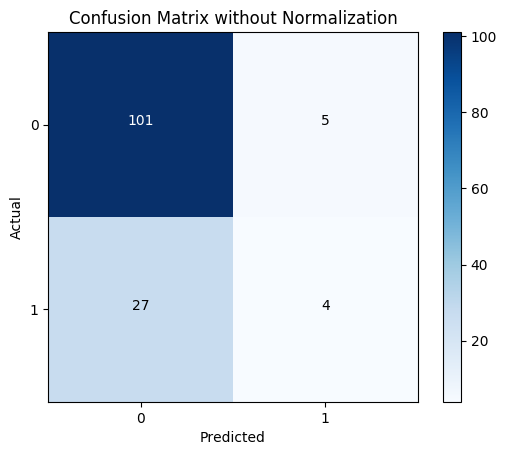

In [ ]:
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [ ]:
df['attempt_suicide'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
type(y_train)


numpy.ndarray

In [ ]:
print(utils.multiclass.type_of_target(y_train))

binary


In [ ]:
type(y_pred_logistic)

numpy.ndarray

In [ ]:
print(utils.multiclass.type_of_target(y_pred_logistic))

binary


# SVM

In [ ]:
SVM_classifier =  svm.SVC()

In [ ]:
SVM_classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_SVM = SVM_classifier.predict(x_test)

In [ ]:
# The coefficients
#print('Coefficients: \n', logreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_SVM))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred_SVM))

Mean squared error: 0.23
R2 score: -0.29


In [ ]:
cf =confusion_matrix(y_test,y_pred_SVM)

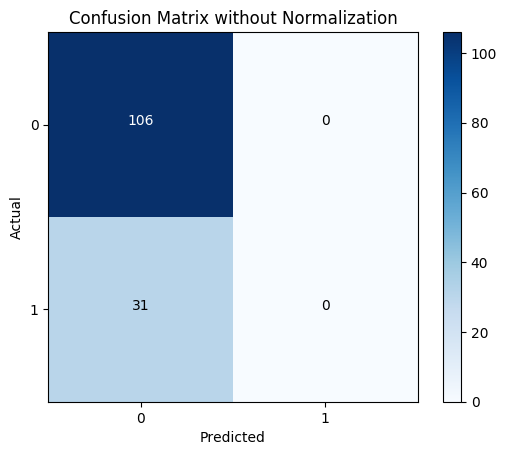

In [ ]:
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Naive Bayes model

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

y_nb_predict = nb.predict(x_test)

In [ ]:
score = metrics.accuracy_score(y_test, y_nb_predict)
print("Accuracy score: {}".format(score))

Accuracy score: 0.6642335766423357


In [ ]:
score_tf_precision_stopping = metrics.precision_score(y_test, y_nb_predict, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test, y_nb_predict, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test, y_nb_predict, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



Precision score: 0.6642335766423357
Recall score: 0.6642335766423357
F1 score: 0.6642335766423357


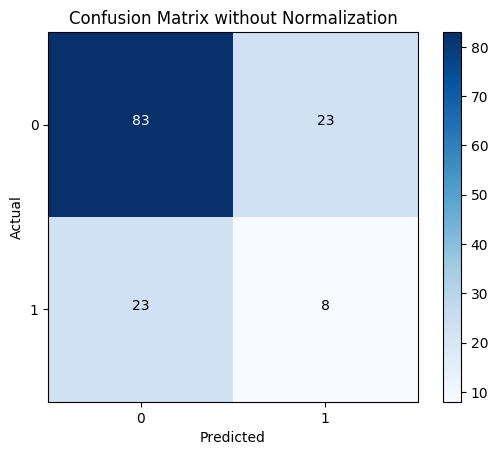

In [ ]:
cf1 =confusion_matrix(y_test, y_nb_predict)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# KNN 

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_extra = KNeighborsClassifier(n_neighbors=10)
knn_extra.fit(x_train,y_train)
y_pred_knn_e = knn_extra.predict(x_test)



In [ ]:
score = metrics.accuracy_score(y_test, y_pred_knn_e)
print("Accuracy score: {}".format(score))

score_tf_precision_stopping = metrics.precision_score(y_test, y_pred_knn_e, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test, y_pred_knn_e, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test,y_pred_knn_e, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.7737226277372263
Precision score: 0.5986467046725985
Recall score: 0.7737226277372263
F1 score: 0.6750172719353579


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



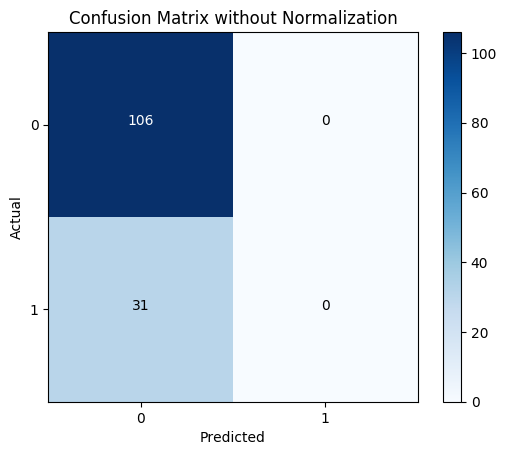

In [ ]:
cf1 =confusion_matrix(y_test,y_pred_knn_e)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# TensorFlow Classification

In [ ]:
import keras
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [ ]:
num_classes = 2
#Convert class vectors to one hot format
y_train1 = keras.utils.to_categorical(y_train,num_classes)

y_test1 = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_test1.shape)

(318, 366)
(137, 2)


In [ ]:
checkpointer2 = ModelCheckpoint(filepath="./best1.hdf5", verbose=0, save_best_only=True) # save best model

In [ ]:

for i in range(5):
   print(i)

   model = Sequential()
   model.add(Dense(25, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
   model.add(Dense(10, activation='relu')) # Hidden 2
   model.add(Dense(y_train1.shape[1], activation='softmax'))

   #adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
   monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=6, verbose=2, mode='auto')
   model.compile(loss="categorical_crossentropy", optimizer='adam')
   model.fit(x_train,y_train1,callbacks=[monitor,checkpointer2],validation_data=(x_test, y_test1),epochs=10)

0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 318 samples, validate on 137 samples
Epoch 1/10
318/318 [==============================] - 1s 3ms/step - loss: 0.6895 - val_loss: 0.6125
Epoch 2/10
318/318 [==============================] - 0s 112us/step - loss: 0.5503 - val_loss: 0.5620
Epoch 3/10
318/318 [==============================] - 0s 105us/step - loss: 0.4964 - val_loss: 0.5379
Epoch 4/10
318/318 [==============================] - 0s 109us/step - loss: 0.4513 - val_loss: 0.5331
Epoch 5/10
318/318 [==============================] - 0s 115us/step - loss: 0.4294 - val_loss: 0.5423
Epoch 6/10
318/318 [==============================] - 0s 110us/step - loss: 0.4147 - val_loss: 0.5479
Epoch 7/10
318/318 [==============================] - 0s 111us/step - loss: 0.4050 - val_loss: 0.5463
Epoch 8/10
318/318 [==============================] - 0s 108us/step - loss: 0.3959 - val_loss: 0.5355
Epoch 9/10
318/318

In [ ]:
model.load_weights('./best1.hdf5')
y_pred_c = model.predict(x_test)
y_pred_c = np.argmax(y_pred_c,axis=1)
y_test_c= np.argmax(y_test1,axis=1)
score = metrics.accuracy_score(y_test_c, y_pred_c)
print("Accuracy score: {}".format(score))

Accuracy score: 0.7737226277372263


In [ ]:
score = metrics.accuracy_score(y_test_c, y_pred_c)
print("Accuracy score: {}".format(score))

score_tf_precision_stopping = metrics.precision_score(y_test_c, y_pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test_c, y_pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test_c, y_pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.7737226277372263
Precision score: 0.5986467046725985
Recall score: 0.7737226277372263
F1 score: 0.6750172719353579


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



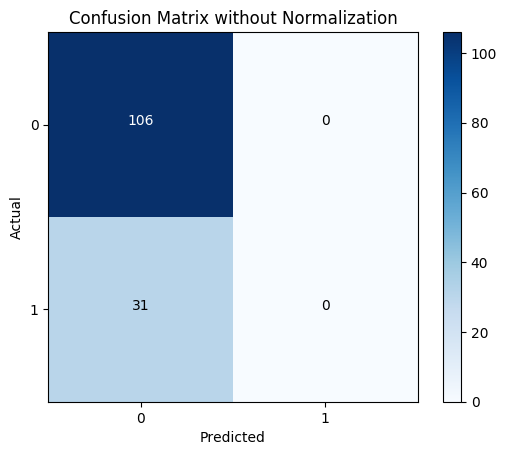

In [ ]:
cf1 =confusion_matrix(y_test_c, y_pred_c)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test_c.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# Testing with over sampling data Using SMOTENC

In [ ]:
y_df_oversampling = df_for_sampling['attempt_suicide']

In [ ]:
y_df_oversampling_array = y_df_oversampling.values

In [ ]:
y_df_oversampling_array

array(['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', '

In [ ]:
x_df_oversampling = df_for_sampling.drop(columns="attempt_suicide")


In [ ]:
x_df_oversampling_array = x_df_oversampling.values

In [ ]:
x_df_oversampling_array[:1]

array([['Male', 'Straight', 35, '$30,000 to $39,999',
        'White non-Hispanic', 'Normal weight', 'Yes', 'No', 'No', 0,
        'Yes', 'Yes', 'Employed for wages', 'mechanical drafter',
        'Associate degree']], dtype=object)

In [ ]:
y_df_oversampling

0      Yes
1       No
2       No
3       No
4       No
5      Yes
6       No
7      Yes
8       No
9      Yes
10      No
11     Yes
12      No
13     Yes
14      No
15      No
16      No
17      No
18     Yes
19      No
20      No
21      No
22      No
23      No
24      No
25      No
26      No
27      No
28      No
29      No
      ... 
438     No
439     No
440     No
441    Yes
442    Yes
443     No
444    Yes
445    Yes
446     No
447     No
448     No
449    Yes
450     No
451     No
452     No
453     No
454     No
455     No
456     No
458     No
459     No
460     No
461    Yes
462     No
463    Yes
464     No
465     No
466    Yes
467     No
468     No
Name: attempt_suicide, Length: 455, dtype: object

In [ ]:
x_df_oversampling

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,employment,job_title,edu_level
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Yes,Employed for wages,mechanical drafter,Associate degree
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,Out of work and looking for work,None,"Some college, no degree"
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10,Yes,Yes,Out of work but not currently looking for work,unemployed,"Some college, no degree"
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,Yes,A student,Student,"Some college, no degree"
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10,No,Yes,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen..."
5,Male,Straight,24,"$50,000 to $74,999",White non-Hispanic,Normal weight,Yes,No,Yes but I haven't,2,Yes,Yes,Employed for wages,game programmer,Bachelor’s degree
6,Male,Straight,22,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,2,Yes,Yes,Employed for wages,Janitor,"High school graduate, diploma or the equivalen..."
7,Female,Gay/Lesbian,24,"$20,000 to $29,999",White non-Hispanic,Normal weight,Yes,No,No,10,Yes,Yes,Employed for wages,Fabricator,Trade/technical/vocational training
8,Male,Straight,20,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,Yes but I haven't,0,Yes,Yes,Employed for wages,cashier,"Some college, no degree"
9,Male,Straight,33,"$50,000 to $74,999",White non-Hispanic,Overweight,No,No,Yes but I haven't,6,Yes,Yes,Employed for wages,Software Engineer,Master’s degree


In [ ]:
x_train_over_sampling,x_test_over_sampling,y_train_over_sampling,y_test_oversampling = train_test_split(x_df_oversampling_array,y_df_oversampling_array, test_size=0.3,random_state=42)

In [ ]:
x_train_over_sampling.shape


(318, 15)

In [ ]:
x_test_over_sampling.shape

(137, 15)

In [ ]:
y_train_over_sampling.shape

(318,)

In [ ]:
y_test_oversampling.shape

(137,)

# OverSampling Technique

In [ ]:
>>> from imblearn.over_sampling import SMOTENC
>>> smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,10,11,12,13,14], random_state=0)
>>> x_resampled, y_resampled = smote_nc.fit_resample(x_train_over_sampling, y_train_over_sampling)
>>> print(sorted(collections.Counter(y_resampled).items()))

[('No', 265), ('Yes', 265)]


In [ ]:
y_column = ['attempt_suicide']
x_columns = ["gender","sexuallity","age","income","race","bodyweight","virgin","prostitution_legal","pay_for_sex","friends","social_fear","depressed","employment","job_title","edu_level"]

In [ ]:
x_resampled_dataframe = pd.DataFrame(x_resampled, columns=x_columns)
x_resampled_dataframe.shape

(530, 15)

In [ ]:
x_resampled_dataframe[:1]

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,employment,job_title,edu_level
0,Male,Straight,19,"$30,000 to $39,999",Asian,Normal weight,Yes,No,Yes but I haven't,1,No,Yes,A student,i/t support,Bachelor’s degree


In [ ]:
y_resampled_dataframe = pd.DataFrame(y_resampled, columns=y_column)
y_resampled_dataframe.shape

(530, 1)

In [ ]:
x_test_dataframe = pd.DataFrame(x_test_over_sampling, columns=x_columns)
x_test_dataframe.shape

(137, 15)

In [ ]:
y_test_dataframe = pd.DataFrame(y_test_oversampling, columns=y_column)
y_test_dataframe.shape

(137, 1)

In [ ]:
# Label Encoding Only for Y (output)
def encode_text_index1(df_arg1, name):
    le = preprocessing.LabelEncoder()
    df_arg1[name] = le.fit_transform(df_arg1[name])
    return le.classes_

In [ ]:
my_list = ['attempt_suicide']

for i in my_list:
  encode_text_index1(y_resampled_dataframe,i)
  encode_text_index1(y_test_dataframe,i) 

In [ ]:
def encode_text_dummy1(df_arg, name):
    dummies = pd.get_dummies(df_arg[name])
    print(dummies)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df_arg[dummy_name] = dummies[x]
    df_arg.drop(name, axis=1, inplace=True)
    
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        x_test_dataframe[dummy_name] = dummies[x]
    x_test_dataframe.drop(name, axis=1, inplace=True)

In [ ]:
print(x_resampled_dataframe.shape)
print(x_test_dataframe.shape)

mylist_3 = ["gender","age","sexuallity","income","race","bodyweight","virgin","prostitution_legal","pay_for_sex","social_fear","depressed","employment","job_title","edu_level"]
for t in mylist_3:
    encode_text_dummy1(x_resampled_dataframe,t)
    #encode_text_dummy1(x_test_dataframe,t)
print(x_resampled_dataframe.shape)
print(x_test_dataframe.shape)

In [ ]:
final_x_train_resampled = x_resampled_dataframe.values
final_y_train_resampled = y_resampled_dataframe.values 
final_x_test_resampled = x_test_dataframe.values
final_y_test_resampled = y_test_dataframe.values

final_y_train_resampled = final_y_train_resampled.flatten()
final_y_test_resampled = final_y_test_resampled.flatten()

# Logistic Regression

In [ ]:
logreg_resampled = linear_model.LogisticRegression()

In [ ]:
final_y_train_resampled[:5]

array([0, 0, 0, 0, 0])

In [ ]:
logreg_resampled.fit(final_x_train_resampled, final_y_train_resampled.flatten())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_logistic_resampled = logreg_resampled.predict(final_x_test_resampled)


In [ ]:
# The coefficients
#print('Coefficients: \n', logreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(final_y_test_resampled, y_pred_logistic_resampled))

Mean squared error: 0.33


In [ ]:
score = metrics.accuracy_score(final_y_test_resampled, y_pred_logistic_resampled)
print("Accuracy score: {}".format(score))

Accuracy score: 0.6715328467153284


In [ ]:
score_tf_precision_stopping = metrics.precision_score(final_y_test_resampled, y_pred_logistic_resampled, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(final_y_test_resampled, y_pred_logistic_resampled, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(final_y_test_resampled, y_pred_logistic_resampled, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



Precision score: 0.6516786297808196
Recall score: 0.6715328467153284
F1 score: 0.6609105764174976


In [ ]:
cf1 =confusion_matrix(final_y_test_resampled,y_pred_logistic_resampled)

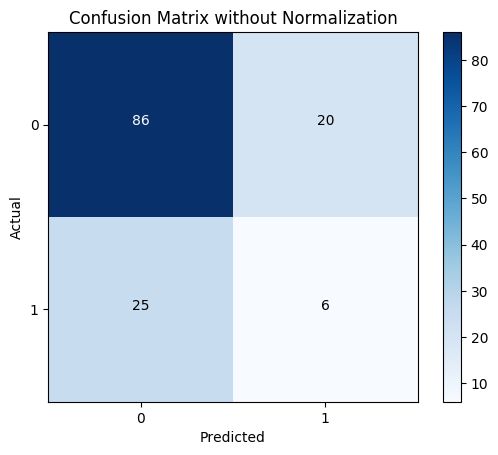

In [ ]:
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(final_y_test_resampled.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# Naive Bayes model

In [ ]:
nb = MultinomialNB()
nb.fit(final_x_train_resampled,final_y_train_resampled)

y_nb_predict = nb.predict(final_x_test_resampled)

In [ ]:
score = metrics.accuracy_score(final_y_test_resampled, y_nb_predict)
print("Accuracy score: {}".format(score))

Accuracy score: 0.5474452554744526


In [ ]:
score_tf_precision_stopping = metrics.precision_score(final_y_test_resampled, y_nb_predict, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(final_y_test_resampled, y_nb_predict, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(final_y_test_resampled,y_nb_predict, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



Precision score: 0.6218531208103679
Recall score: 0.5474452554744526
F1 score: 0.5773628564978552


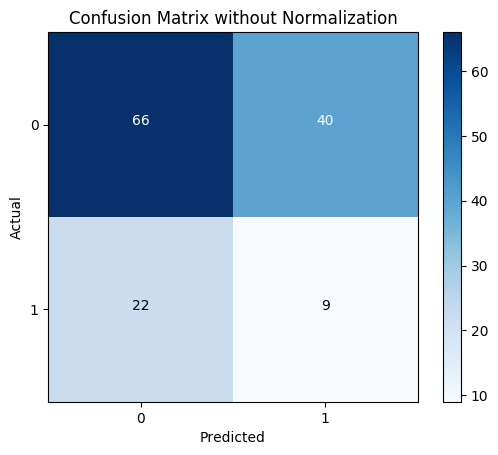

In [ ]:
cf1 =confusion_matrix(final_y_test_resampled,y_nb_predict)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(final_y_test_resampled.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# KNN

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_extra = KNeighborsClassifier(n_neighbors=10)
knn_extra.fit(final_x_train_resampled,final_y_train_resampled)
y_pred_knn_e = knn_extra.predict(final_x_test_resampled)



In [ ]:
score = metrics.accuracy_score(final_y_test_resampled, y_pred_knn_e)
print("Accuracy score: {}".format(score))

score_tf_precision_stopping = metrics.precision_score(final_y_test_resampled, y_pred_knn_e, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(final_y_test_resampled, y_pred_knn_e, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(final_y_test_resampled,y_pred_knn_e, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.583941605839416
Precision score: 0.6059739185597391
Recall score: 0.583941605839416
F1 score: 0.5944413129528491


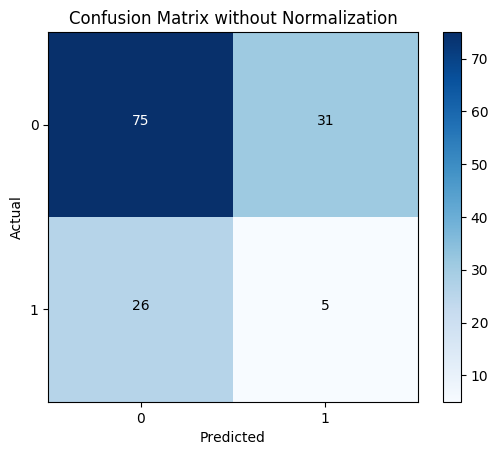

In [ ]:
cf1 =confusion_matrix(final_y_test_resampled,y_pred_knn_e)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(final_y_test_resampled.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# Tensorflow classification

In [ ]:
import keras
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
num_classes = 2
#Convert class vectors to one hot format
final_y_train1_resampled = keras.utils.to_categorical(final_y_train_resampled,num_classes)

final_y_test1_resampled = keras.utils.to_categorical(final_y_test_resampled,num_classes)
print(final_x_train_resampled.shape)
print(final_y_test1_resampled.shape)

(530, 294)
(137, 2)


In [ ]:
checkpointer2 = ModelCheckpoint(filepath="./best1.hdf5", verbose=0, save_best_only=True) # save best model

In [ ]:

for i in range(5):
   print(i)

   model = Sequential()
   model.add(Dense(25, input_dim=final_x_train_resampled.shape[1], activation='relu')) # Hidden 1
   model.add(Dense(10, activation='relu')) # Hidden 3
   model.add(Dense(final_y_train1_resampled.shape[1], activation='softmax'))

   #adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
   monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=6, verbose=2, mode='auto')
   model.compile(loss="categorical_crossentropy", optimizer='adam')
   model.fit(final_x_train_resampled,final_y_train1_resampled,callbacks=[monitor,checkpointer2],validation_data=(final_x_test_resampled, final_y_test1_resampled),epochs=10)

0
Train on 530 samples, validate on 137 samples
Epoch 1/10
530/530 [==============================] - 0s 765us/step - loss: 0.6549 - val_loss: 0.6324
Epoch 2/10
530/530 [==============================] - 0s 125us/step - loss: 0.5987 - val_loss: 0.6236
Epoch 3/10
530/530 [==============================] - 0s 107us/step - loss: 0.5387 - val_loss: 0.6343
Epoch 4/10
530/530 [==============================] - 0s 127us/step - loss: 0.4678 - val_loss: 0.6410
Epoch 5/10
530/530 [==============================] - 0s 109us/step - loss: 0.3979 - val_loss: 0.6742
Epoch 6/10
530/530 [==============================] - 0s 113us/step - loss: 0.3288 - val_loss: 0.7358
Epoch 7/10
530/530 [==============================] - 0s 112us/step - loss: 0.2801 - val_loss: 0.7995
Epoch 8/10
530/530 [==============================] - 0s 109us/step - loss: 0.2358 - val_loss: 0.8577
Epoch 00008: early stopping
1
Train on 530 samples, validate on 137 samples
Epoch 1/10
530/530 [==============================] - 0s 875

In [ ]:
model.load_weights('./best1.hdf5')
y_pred_c = model.predict(final_x_test_resampled)
y_pred_c = np.argmax(y_pred_c,axis=1)
y_test_c= np.argmax(final_y_test1_resampled,axis=1)
score = metrics.accuracy_score(y_test_c, y_pred_c)
print("Accuracy score: {}".format(score))

Accuracy score: 0.6715328467153284


In [ ]:
score = metrics.accuracy_score(y_test_c, y_pred_c)
print("Accuracy score: {}".format(score))

score_tf_precision_stopping = metrics.precision_score(y_test_c, y_pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test_c, y_pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test_c, y_pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.6715328467153284
Precision score: 0.6516786297808196
Recall score: 0.6715328467153284
F1 score: 0.6609105764174976


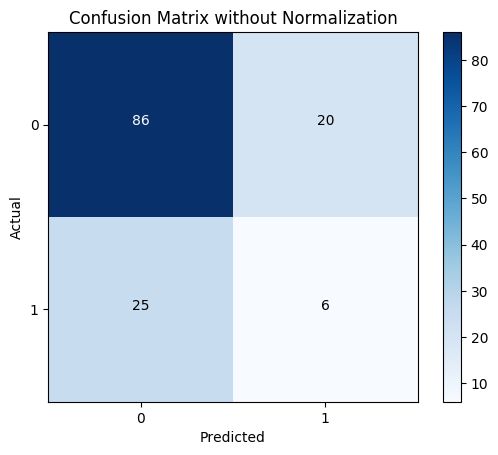

In [ ]:
cf1 =confusion_matrix(y_test_c, y_pred_c)
plt.imshow(cf1,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test_c.flatten()))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf1.max() / 2.
for i,j in itertools.product(range(cf1.shape[0]),range(cf1.shape[1])):
    plt.text(j,i,format(cf1[i,j],'d'),horizontalalignment='center',color='white' if cf1[i,j] >thresh else 'black')
plt.show();

# Discussion

---

### Based on the exploratory data analysis records which are classified as suicide attempt as positive, counts to 85 and records which are classified as never attempt a suicide is 372. Data is biased because one class has more number of records as compared to other. Therefore and accuracy wont be the best measure to predict on such biased data.

### Therefore,  over sampling is done to the records of class which has minimum number of records. This helped to make number of records in both classes to be equal. The technique used to do oversampling is by using SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) as dataset contains both numerical and categorical data. Important thing to note here is that oversampling is performed only on training set after train test split to avoid synthetic records to be added to test set which does not represent the actual test set and real world recordings/readings. 

### After oversampling, confusion matrix shows that correct prediction on class which had less records has increased but not to a substantial amount. Moreover incorrect classification also increased where majority class is present. Hence we cannot rely completely on accuracy metric here again and need more evidence  on this behavior of this model.


---



# Conclusion


---

### Accuracy for various developed models are in range from 54% to 77%. But accuracy is not the best measure to predict the model performance/ quality when we look at the confusion matrix.

### Moreover having more number of records might help Neural network models to learn features of classes, due to behavior observed in confusion matrix.


---



# References


---

## Dataset 
https://www.kaggle.com/kingburrito666/the-demographic-rforeveralone-dataset/home 

## Synthetic Minority Over-sampling Technique for Nominal and Continuous 
https://imbalancedlearn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html 

## Scikit Learn Official Website for documentation
https://scikit-learn.org/stable/

## Pandas Documentation 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## Matplotlib library reference
https://matplotlib.org/


